In [235]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import time
import calendar
import random
import warnings
warnings.filterwarnings('ignore')

In [236]:
pip install mysql

Note: you may need to restart the kernel to use updated packages.


In [237]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [238]:
import pymysql
import mysql


In [239]:
# loading datasets

source = ['Facebook', 'GooglePlus', 'LinkedIn']
topic = ['Economy','Microsoft', 'Obama', 'Palestine']

folder_path = 'D:/data set/'
main_df = pd.read_csv(folder_path+'Group_17_data.csv')
df = {}
for src in source:
  for tpc in topic:
    file_name = f'{src}_{tpc}.csv'
    file_path = f'{folder_path}{file_name}'
    df[f'{src}_{tpc}'] = pd.read_csv(file_path)

In [240]:
# reading the dataset

news_df = pd.read_csv(folder_path+'Group_17_data.csv')
main_df = news_df.copy()
main_df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


In [241]:
main_df.tail()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
93234,61851.0,Stocks rise as investors key in on US economy ...,The June employment report is viewed as a cruc...,MarketWatch,economy,2016-07-07 15:31:05,0.104284,0.044943,-1,3,5
93235,61865.0,Russian PM proposes to use conservative and to...,"In addition, establish stimulating economic po...",TASS,economy,2016-07-07 15:31:10,0.072194,0.000000,-1,0,1
93236,104793.0,Palestinian Government Uses Foreign Aid To Pay...,The Palestinian government spends nearly $140 ...,Daily Caller,palestine,2016-07-07 15:38:26,0.291667,-0.139754,5,1,0
93237,104794.0,Palestine Youth Orchestra prepares for first U...,Palestine Youth Orchestra prepares for first U...,Ahram Online,palestine,2016-07-07 15:59:22,0.121534,0.092313,0,0,0
93238,61870.0,Sausalito businesswoman wins $10000 in Microso...,"Goldstein, the proprietor of the TG Travel Gro...",East Bay Times,microsoft,2016-07-07 16:16:11,0.000000,0.054554,-1,1,0


In [242]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93239 entries, 0 to 93238
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             93239 non-null  float64
 1   Title              93239 non-null  object 
 2   Headline           93224 non-null  object 
 3   Source             92960 non-null  object 
 4   Topic              93239 non-null  object 
 5   PublishDate        93239 non-null  object 
 6   SentimentTitle     93239 non-null  float64
 7   SentimentHeadline  93239 non-null  float64
 8   Facebook           93239 non-null  int64  
 9   GooglePlus         93239 non-null  int64  
 10  LinkedIn           93239 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 7.8+ MB


In [243]:
main_df.describe() # checking distribution of  numerical columns

,IDLink,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
count,93239.000000,93239.000000,93239.000000,93239.000000,93239.000000,93239.000000
mean,51560.653257,-0.005411,-0.027493,113.141336,3.888362,16.547957
std,30391.078704,0.136431,0.141964,620.173233,18.492648,154.459048
min,1.000000,-0.950694,-0.755433,-1.000000,-1.000000,-1.000000
25%,24301.500000,-0.079057,-0.114574,0.000000,0.000000,0.000000
50%,52275.000000,0.000000,-0.026064,5.000000,0.000000,0.000000
75%,76585.500000,0.064255,0.059709,33.000000,2.000000,4.000000
max,104802.000000,0.962354,0.964646,49211.000000,1267.000000,20341.000000


In [244]:
main_df.shape

(93239, 11)

In [245]:
main_df.dtypes # checking for data types

IDLink               float64
Title                 object
Headline              object
Source                object
Topic                 object
PublishDate           object
SentimentTitle       float64
SentimentHeadline    float64
Facebook               int64
GooglePlus             int64
LinkedIn               int64
dtype: object

In [246]:
main_df.columns

Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'SentimentTitle', 'SentimentHeadline', 'Facebook', 'GooglePlus',
       'LinkedIn'],
      dtype='object')

In [247]:
for cols in source:
    main_df[cols] = main_df[cols].apply(lambda x:x+1)

for i in df:
    for cols in df[i]:
        if cols == 'IDLink':
            continue
        df[i][cols] += 1

In [248]:
df['Facebook_Economy'].head()
#df['LinkedIn_Economy'].head()
#TS1: indicates timestamp from 0-20 mins
#values 0 indiactes news published just recent, value 1 to infinte indicates positive popularity up on publication,-1 to -infinte indicates news not published yet.

,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
0,1,0,0,0,0,0,0,0,0,8,...,14,14,14,14,14,14,14,14,14,14
1,2,0,0,0,0,0,0,0,0,4,...,43,43,43,43,43,43,43,43,43,43
2,3,0,0,0,0,0,0,0,0,0,...,99,99,99,99,99,99,99,99,99,99
3,4,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
4,5,0,0,0,0,0,0,0,0,0,...,35,35,35,35,35,35,35,35,35,35


In [249]:
main_df.isnull().sum() # checking for missing values

IDLink                 0
Title                  0
Headline              15
Source               279
Topic                  0
PublishDate            0
SentimentTitle         0
SentimentHeadline      0
Facebook               0
GooglePlus             0
LinkedIn               0
dtype: int64

In [250]:
# source has 279 missing values for which we can impute mode value of source but lets check for top most repeated values.

main_df.Source.value_counts()[:3]

Bloomberg    1732
Reuters      1321
ABC News     1098
Name: Source, dtype: int64

In [251]:
main_df['Source'].fillna('Bloomberg', inplace = True) # filling Source null values with bloomberg (most repeated)
main_df.dropna(inplace = True)                        # dropping null values in headline

# PublishDate change type to datetime from object
def convert_to_dt(df):
  df['PublishDate'] = pd.to_datetime(df['PublishDate'])
  df['PublishTime'] = df['PublishDate'].dt.time
  df['PublishDate'] = df['PublishDate'].dt.date

convert_to_dt(main_df)


In [252]:
main_df.isnull().sum()

IDLink               0
Title                0
Headline             0
Source               0
Topic                0
PublishDate          0
SentimentTitle       0
SentimentHeadline    0
Facebook             0
GooglePlus           0
LinkedIn             0
PublishTime          0
dtype: int64

In [253]:
# Extract Day of the Week

main_df['Weekday'] = main_df.PublishDate.apply(lambda x: calendar.day_name[x.weekday()])

main_df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,PublishTime,Weekday
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02,0.000000,-0.053300,0,0,0,00:00:00,Tuesday
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20,0.208333,-0.156386,0,0,0,00:00:00,Saturday
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28,-0.425210,0.139754,0,0,0,00:00:00,Saturday
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01,0.000000,0.026064,0,0,0,00:06:00,Sunday
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01,0.000000,0.141084,0,0,0,00:11:00,Sunday


In [254]:
print('No.of unique Sources in (Original):',len(list(main_df['Source'].unique())))


No.of unique Sources in (Original): 5755


In [255]:
main_df['Source'] = main_df['Source'].apply(lambda x:x.lower())
print('No.of unique Sources(after):',len(list(main_df['Source'].unique())))

No.of unique Sources(after): 5740


In [256]:
print('Start Date:',min(main_df['PublishDate']))
print('End Date:',max(main_df['PublishDate']))

Start Date: 2002-04-02
End Date: 2016-07-07


In [257]:
# we consider the data only from 2015-11-01 to 2016-07-07 ( as per our requirement from november 2015 to july 2016) 

main_df = main_df[(main_df['PublishDate']>=pd.to_datetime('2015-11-01').date()) & (main_df['PublishDate']<=pd.to_datetime('2016-08-01').date())]

print('BEGIN DATE:',min(main_df['PublishDate']))
print('END DATE:',max(main_df['PublishDate']))

main_df.head()

BEGIN DATE: 2015-11-01
END DATE: 2016-07-07


,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,PublishTime,Weekday
6,80690.0,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",bloomberg,palestine,2016-02-28,0.000000,-0.005906,1,1,1,14:03:00,Sunday
31,28854.0,Buffett: Politicians 'Dead Wrong' on Economy,Warren Buffett has a message for presidential ...,the wall street journal,economy,2016-02-28,0.051031,-0.037921,0,0,0,19:17:00,Sunday
56,81052.0,"Monday, 29 Feb 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",bloomberg,palestine,2016-03-01,0.000000,0.048546,1,1,1,09:29:00,Tuesday
111,80994.0,"Tuesday, 1 Mar 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",bloomberg,palestine,2016-03-01,-0.243068,0.048546,1,1,1,00:15:00,Tuesday
416,946.0,Microsoft Takes Six Billion Dollars From Android,"A long time ago, Microsoft MSFT +0.00% purchas...",forbes,microsoft,2015-11-01,0.000000,0.115928,0,0,0,00:00:00,Sunday


In [258]:
index_to_drop = main_df[(main_df['Facebook']==0) & (main_df['GooglePlus']==0) & (main_df['LinkedIn']==0)].index
print('Shape_before_drop:',main_df.shape)

# SHAPE AFTER AND BEFORE DROPPING THE DATA with Timestamp 0 (Which doesnot add any value for our predictions)
main_df.drop(index_to_drop,inplace=True)
print('Shape_after_drop:',main_df.shape)

Shape_before_drop: (92812, 13)
Shape_after_drop: (87481, 13)


In [259]:
print(main_df[main_df.duplicated()])     #dropping duplicates 
main_df = main_df.drop_duplicates()

        IDLink                Title  \
44426  80690.0  Monday, 29 Feb 2016   
44944  80994.0  Tuesday, 1 Mar 2016   
45122  81052.0  Monday, 29 Feb 2016   

                                                Headline     Source  \
44426  RAMALLAH, February 25, 2016 (WAFA) - Palestine...  bloomberg   
44944  RAMALLAH, February 29, 2016 (WAFA) - The Gover...  bloomberg   
45122  RAMALLAH, February 29, 2016 (WAFA) - The Gover...  bloomberg   

           Topic PublishDate  SentimentTitle  SentimentHeadline  Facebook  \
44426  palestine  2016-02-28        0.000000          -0.005906         1   
44944  palestine  2016-03-01       -0.243068           0.048546         1   
45122  palestine  2016-03-01        0.000000           0.048546         1   

       GooglePlus  LinkedIn PublishTime  Weekday  
44426           1         1    14:03:00   Sunday  
44944           1         1    00:15:00  Tuesday  
45122           1         1    09:29:00  Tuesday  


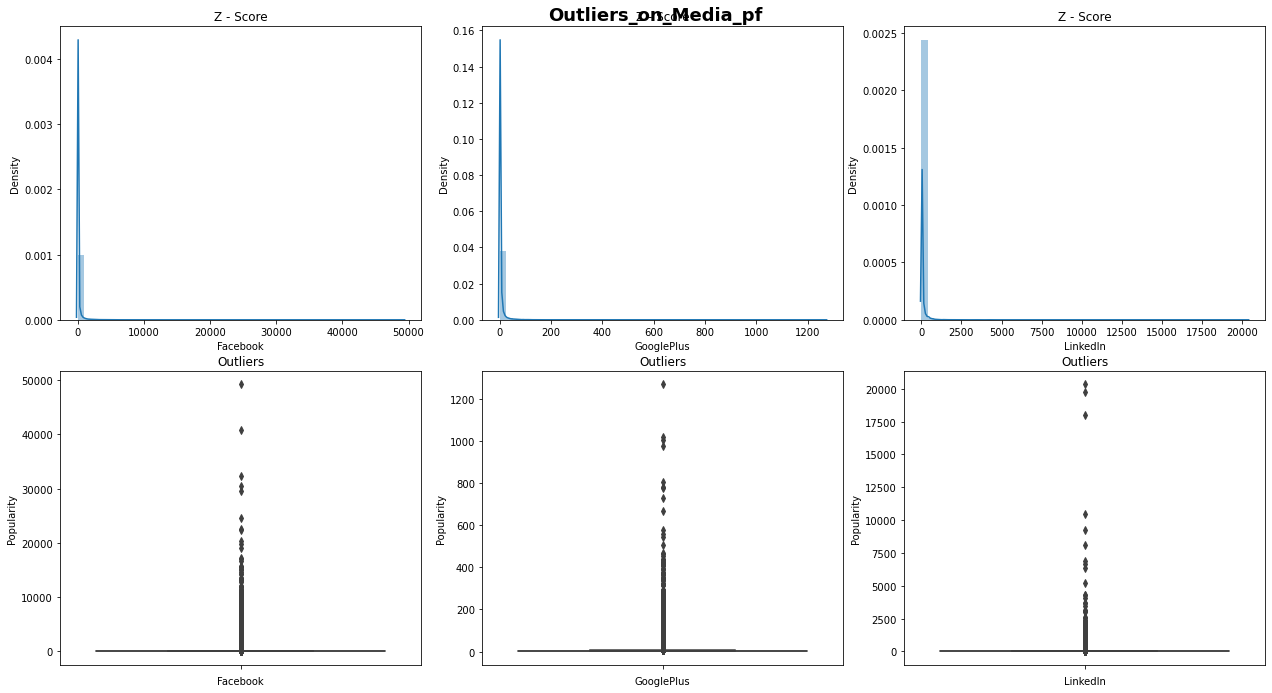

In [260]:
def show_outliers(df, three_d = False):
    fig, axes = plt.subplots(2,3,figsize=(18, 10))
    fig.tight_layout(pad=3.0)
    for src in range(len(source)):
        sns.distplot(ax=axes[0][src],x=df[source[src]])
        axes[0][src].set_xlabel(source[src],fontdict={'fontsize': 10})
        axes[1][src].set_ylabel('Density',fontdict={'fontsize': 10})
        #box plot to view the outliers

        sns.boxplot(ax=axes[1][src],y=df[source[src]] )    
        axes[1][src].set_xlabel(source[src],fontdict={'fontsize': 10})
        axes[1][src].set_ylabel('Popularity',fontdict={'fontsize': 10})
        #used z-score technique to detect outliers (works on comaparing one value to the group mean)

        axes[0][src].set_title('Z - Score')
        axes[1][src].set_title('Outliers')

        plt.suptitle('Outliers_on_Media_pf',fontsize = 18,fontweight = 'bold')

    plt.show()
    
show_outliers(main_df, True)



In [261]:
#we used 90th percentile quantile method to treatthe outliers.
def outliers_treatment(df, source):
    for src in source:   
        ninetieth_percentile = np.percentile(df[src], 90)
        df[src] = np.where(df[src] > ninetieth_percentile, ninetieth_percentile, df[src])
    return df

main_df = outliers_treatment(main_df, source)

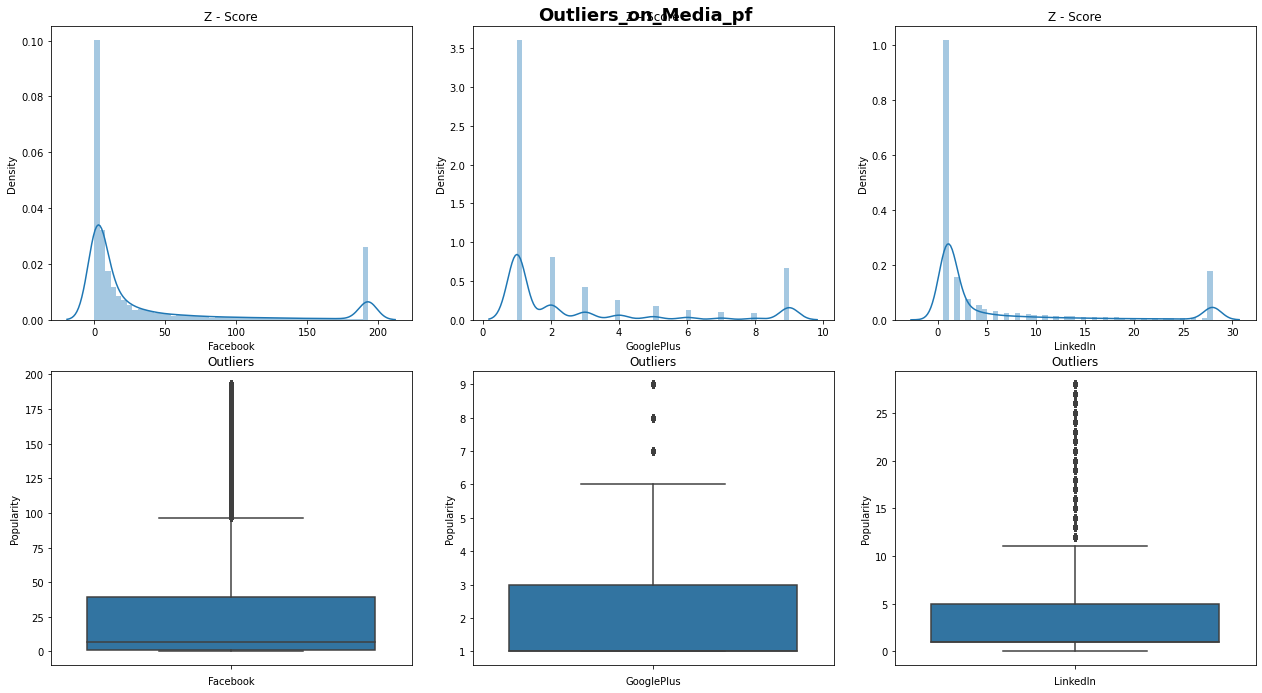

In [262]:
show_outliers(main_df, False)

In [263]:
#to standardize the data, we used standard scaler method and also used to transform the data
scaler = StandardScaler()

for src in source:
    #we not include values with 0, because they donot add any value to our predictions. 
    main = main_df[src].apply(lambda x:x if x!=(0) else np.nan)   
    main_df[f'{src}_scaled'] = scaler.fit_transform(main.values.reshape(-1,1))
    main_df[f'{src}_scaled'].fillna(0,inplace=True) 
    main_df[src].fillna(0,inplace=True)

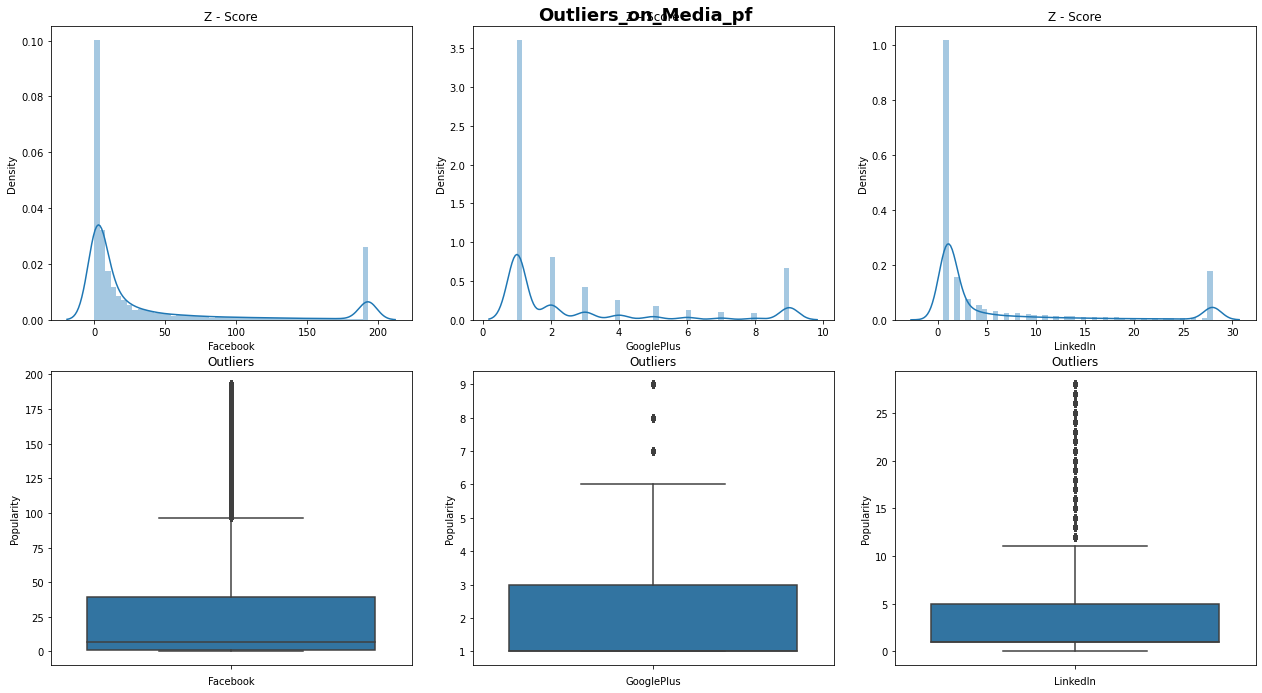

In [264]:
show_outliers(main_df, True)

In [265]:
main_df = main_df.reset_index(drop=True) #resetting the index after dropping unwanted data, which doesnot add any value to our upcoming predictions.
main_df.head(2)

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,PublishTime,Weekday,Facebook_scaled,GooglePlus_scaled,LinkedIn_scaled
0,80690.0,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",bloomberg,palestine,2016-02-28,0.0,-0.005906,1.0,1.0,1.0,14:03:00,Sunday,-0.633726,-0.617774,-0.549169
1,81052.0,"Monday, 29 Feb 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",bloomberg,palestine,2016-03-01,0.0,0.048546,1.0,1.0,1.0,09:29:00,Tuesday,-0.633726,-0.617774,-0.549169


In [266]:
main_df['SentimentTitle_Category'] = main_df['SentimentTitle'].apply(lambda x: 'neutral' if x == 0 else 'positive' if x > 0 else 'negative')

main_df['SentimentHeadline_Category'] = main_df['SentimentHeadline'].apply(lambda x: 'neutral' if x == 0 else 'positive' if x > 0 else 'negative')
main_df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,PublishTime,Weekday,Facebook_scaled,GooglePlus_scaled,LinkedIn_scaled,SentimentTitle_Category,SentimentHeadline_Category
0,80690.0,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",bloomberg,palestine,2016-02-28,0.000000,-0.005906,1.0,1.0,1.0,14:03:00,Sunday,-0.633726,-0.617774,-0.549169,neutral,negative
1,81052.0,"Monday, 29 Feb 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",bloomberg,palestine,2016-03-01,0.000000,0.048546,1.0,1.0,1.0,09:29:00,Tuesday,-0.633726,-0.617774,-0.549169,neutral,positive
2,80994.0,"Tuesday, 1 Mar 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",bloomberg,palestine,2016-03-01,-0.243068,0.048546,1.0,1.0,1.0,00:15:00,Tuesday,-0.633726,-0.617774,-0.549169,negative,positive
3,311.0,Microsoft offering £100 discount on original B...,Just ahead of the market rollout of Microsoft'...,international business times via yahoo uk & ir...,microsoft,2015-11-08,0.000000,-0.132812,1.0,1.0,1.0,05:25:00,Sunday,-0.633726,-0.617774,-0.549169,neutral,negative
4,252.0,Economy to improve though no change in last 6 ...,"&quot;In the coming six months, there seems to...",ians india private limited/yahoo india news vi...,economy,2015-11-08,-0.082022,0.205537,1.0,1.0,1.0,05:40:00,Sunday,-0.633726,-0.617774,-0.549169,negative,positive


In [267]:
main.tail()

93234    6.0
93235    2.0
93236    1.0
93237    1.0
93238    1.0
Name: LinkedIn, dtype: float64

In [268]:
main_df.dtypes

IDLink                        float64
Title                          object
Headline                       object
Source                         object
Topic                          object
PublishDate                    object
SentimentTitle                float64
SentimentHeadline             float64
Facebook                      float64
GooglePlus                    float64
LinkedIn                      float64
PublishTime                    object
Weekday                        object
Facebook_scaled               float64
GooglePlus_scaled             float64
LinkedIn_scaled               float64
SentimentTitle_Category        object
SentimentHeadline_Category     object
dtype: object

In [269]:
# saving to CSV

main_df.to_csv("Group_17_data_cleaned.csv")

In [270]:
# saving to pkl

main_df.to_pickle("Group_17_data_cleaned.pkl")

In [271]:
# saving to npz

np.savez('Group_17_data_cleaned', main_df)

In [272]:

import pymysql.cursors
connection = pymysql.connect(host='localhost', user = 'root', password='1234')
DatabaseName= 'Group_17_data'
cur = connection.cursor(pymysql.cursors.DictCursor)
sqlStatement = "CREATE DATABASE if not exists "+DatabaseName  
cur.execute(sqlStatement)

1

In [273]:
cur.execute("SHOW DATABASES")
databaseList = cur.fetchall()
for datatbase in databaseList:
    print(datatbase)

{'Database': 'auto_mpg'}
{'Database': 'group_17_data'}
{'Database': 'hello'}
{'Database': 'information_schema'}
{'Database': 'mysql'}
{'Database': 'performance_schema'}
{'Database': 'sakila'}
{'Database': 'sys'}
{'Database': 'world'}


In [274]:
connection.select_db('group_17_data')

In [275]:
cur.execute("use group_17_data")

0

In [276]:
cur.execute("show tables")

1

In [277]:
cur.execute("CREATE TABLE if not exists News_Final(IDLink double,Title text,Headline text,Source text,Topic text ,PublishDate datetime,SentimentTitle double,SentimentHeadline double,Facebook double,GooglePlus double,LinkedIn double,PublishTime time,Weekday text,Facebook_scaled double,GooglePlus_scaled double,LinkedIn_scaled double,SentimentTitle_Category text,SentimentHeadline_Category text)")
print("Created Table successfully")

Created Table successfully


In [278]:
for i,row in main_df.iterrows():
    sql = "INSERT INTO News_final VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
    cur.execute(sql,tuple(row))
    print("Record inserted")  

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record i

AttributeError: 'DictCursor' object has no attribute 'commit'

In [279]:
sql = "SELECT * FROM News_final"
cur.execute(sql)

87478

In [280]:
dataset = pd.DataFrame(cur.fetchall())
display(dataset)

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,PublishTime,Weekday,Facebook_scaled,GooglePlus_scaled,LinkedIn_scaled,SentimentTitle_Category,SentimentHeadline_Category
0,80690.0,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",bloomberg,palestine,2016-02-28,0.000000,-0.005906,1.0,1.0,1.0,0 days 14:03:00,Sunday,-0.633726,-0.617774,-0.549169,neutral,negative
1,81052.0,"Monday, 29 Feb 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",bloomberg,palestine,2016-03-01,0.000000,0.048546,1.0,1.0,1.0,0 days 09:29:00,Tuesday,-0.633726,-0.617774,-0.549169,neutral,positive
2,80994.0,"Tuesday, 1 Mar 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",bloomberg,palestine,2016-03-01,-0.243068,0.048546,1.0,1.0,1.0,0 days 00:15:00,Tuesday,-0.633726,-0.617774,-0.549169,negative,positive
3,311.0,Microsoft offering £100 discount on original B...,Just ahead of the market rollout of Microsoft'...,international business times via yahoo uk & ir...,microsoft,2015-11-08,0.000000,-0.132812,1.0,1.0,1.0,0 days 05:25:00,Sunday,-0.633726,-0.617774,-0.549169,neutral,negative
4,252.0,Economy to improve though no change in last 6 ...,"&quot;In the coming six months, there seems to...",ians india private limited/yahoo india news vi...,economy,2015-11-08,-0.082022,0.205537,1.0,1.0,1.0,0 days 05:40:00,Sunday,-0.633726,-0.617774,-0.549169,negative,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87473,61851.0,Stocks rise as investors key in on US economy ...,The June employment report is viewed as a cruc...,marketwatch,economy,2016-07-07,0.104284,0.044943,0.0,4.0,6.0,0 days 15:31:05,Thursday,0.000000,0.508931,0.020921,positive,positive
87474,61865.0,Russian PM proposes to use conservative and to...,"In addition, establish stimulating economic po...",tass,economy,2016-07-07,0.072194,0.000000,0.0,1.0,2.0,0 days 15:31:10,Thursday,0.000000,-0.617774,-0.435151,positive,neutral
87475,104793.0,Palestinian Government Uses Foreign Aid To Pay...,The Palestinian government spends nearly $140 ...,daily caller,palestine,2016-07-07,0.291667,-0.139754,6.0,2.0,1.0,0 days 15:38:26,Thursday,-0.554619,-0.242206,-0.549169,positive,negative
87476,104794.0,Palestine Youth Orchestra prepares for first U...,Palestine Youth Orchestra prepares for first U...,ahram online,palestine,2016-07-07,0.121534,0.092313,1.0,1.0,1.0,0 days 15:59:22,Thursday,-0.633726,-0.617774,-0.549169,positive,positive


In [281]:
cur.close()